<p>
    <img src="https://s3.amazonaws.com/iotanalytics-templates/Logo.png" style="float:left;width:65px">
    <h1 style="float:left;color:#1A5276;padding-left:15px;font-size:20px;">AWS IoT Analytics | Notebook</h1>
</p>


# Pre-existed

When loading data from IoT Analytics datasets, the client should be initialized first:

In [1]:
import boto3

# create IoT Analytics client
client = boto3.client('iotanalytics')

Now we can get the data location (URL) for the given dataset and start working with the data (In order to need to perform get_dataset_content, you need to grant iot analytics corresponding IAM permission):

In [2]:
dataset = "sensorstreamdataset"
dataset_url = client.get_dataset_content(datasetName = dataset)['entries'][0]['dataURI']

# start working with the data

# My Work:

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import matplotlib.gridspec as gridspec

In [95]:
client = boto3.client('s3')

resource = boto3.resource('s3')

response = client.list_buckets()

for bucket in response['Buckets']:
    print(f'{bucket["Name"]}')

sensordatabucket-channel
sensordatabucket-dataset
sensordatabucket-datastore


In [96]:
obj = client.get_object(Bucket='sensordatabucket-dataset', Key = 'output.csv')
sensorData = pd.read_csv(obj.get("Body"))
print(sensorData)

   temperature  humidity  winddirection  windintensity  rainheight  \
0            8         9              7             10           6   
1           18        19             17             20          16   
2           14        15             13             16          12   
3           18        19             17             20          16   
4            8         9              7             10           6   
5            4         5              3              6           2   
6            0         1             -1              2          -2   
7           16        17             15             18          14   
8           10        11              9             12           8   
9           12        13             11             14          10   

            time                     __dt  
0  1675676327107  2023-02-06 00:00:00.000  
1  1675673797280  2023-02-06 00:00:00.000  
2  1675677870506  2023-02-06 00:00:00.000  
3  1675675864394  2023-02-06 00:00:00.000  
4  167567

## Time conversion

In [97]:
sensorData['time']=(pd.to_datetime(sensorData['time'],unit='ms')) 
sensorData['timeHour'] = sensorData['time'].dt.strftime('%H:%M')
sensorData.sort_values('timeHour',  ascending=False)

,temperature,humidity,winddirection,windintensity,rainheight,time,__dt,timeHour
2,14,15,13,16,12,2023-02-06 10:04:30.506,2023-02-06 00:00:00.000,10:04
0,8,9,7,10,6,2023-02-06 09:38:47.107,2023-02-06 00:00:00.000,09:38
3,18,19,17,20,16,2023-02-06 09:31:04.394,2023-02-06 00:00:00.000,09:31
5,4,5,3,6,2,2023-02-06 09:23:34.748,2023-02-06 00:00:00.000,09:23
4,8,9,7,10,6,2023-02-06 09:22:14.352,2023-02-06 00:00:00.000,09:22
8,10,11,9,12,8,2023-02-06 09:02:49.913,2023-02-06 00:00:00.000,09:02
9,12,13,11,14,10,2023-02-06 09:02:52.408,2023-02-06 00:00:00.000,09:02
6,0,1,-1,2,-2,2023-02-06 09:01:19.819,2023-02-06 00:00:00.000,09:01
7,16,17,15,18,14,2023-02-06 08:58:45.077,2023-02-06 00:00:00.000,08:58
1,18,19,17,20,16,2023-02-06 08:56:37.280,2023-02-06 00:00:00.000,08:56


In [98]:
# sensorData['time']=(pd.to_datetime(sensorData['time'],unit='ms')) 
# sensorData['timeHour'] = sensorData['time'].dt.strftime('%H:%M')
sensorData.sort_values('time',  ascending=False)

,temperature,humidity,winddirection,windintensity,rainheight,time,__dt,timeHour
2,14,15,13,16,12,2023-02-06 10:04:30.506,2023-02-06 00:00:00.000,10:04
0,8,9,7,10,6,2023-02-06 09:38:47.107,2023-02-06 00:00:00.000,09:38
3,18,19,17,20,16,2023-02-06 09:31:04.394,2023-02-06 00:00:00.000,09:31
5,4,5,3,6,2,2023-02-06 09:23:34.748,2023-02-06 00:00:00.000,09:23
4,8,9,7,10,6,2023-02-06 09:22:14.352,2023-02-06 00:00:00.000,09:22
9,12,13,11,14,10,2023-02-06 09:02:52.408,2023-02-06 00:00:00.000,09:02
8,10,11,9,12,8,2023-02-06 09:02:49.913,2023-02-06 00:00:00.000,09:02
6,0,1,-1,2,-2,2023-02-06 09:01:19.819,2023-02-06 00:00:00.000,09:01
7,16,17,15,18,14,2023-02-06 08:58:45.077,2023-02-06 00:00:00.000,08:58
1,18,19,17,20,16,2023-02-06 08:56:37.280,2023-02-06 00:00:00.000,08:56


In [99]:
sensorData['epoch'] = (sensorData['time'] - dt.datetime(1970,1,1)).dt.total_seconds()
sensorData.sort_values('epoch', ascending = False)

,temperature,humidity,winddirection,windintensity,rainheight,time,__dt,timeHour,epoch
2,14,15,13,16,12,2023-02-06 10:04:30.506,2023-02-06 00:00:00.000,10:04,1.675678e+09
0,8,9,7,10,6,2023-02-06 09:38:47.107,2023-02-06 00:00:00.000,09:38,1.675676e+09
3,18,19,17,20,16,2023-02-06 09:31:04.394,2023-02-06 00:00:00.000,09:31,1.675676e+09
5,4,5,3,6,2,2023-02-06 09:23:34.748,2023-02-06 00:00:00.000,09:23,1.675675e+09
4,8,9,7,10,6,2023-02-06 09:22:14.352,2023-02-06 00:00:00.000,09:22,1.675675e+09
9,12,13,11,14,10,2023-02-06 09:02:52.408,2023-02-06 00:00:00.000,09:02,1.675674e+09
8,10,11,9,12,8,2023-02-06 09:02:49.913,2023-02-06 00:00:00.000,09:02,1.675674e+09
6,0,1,-1,2,-2,2023-02-06 09:01:19.819,2023-02-06 00:00:00.000,09:01,1.675674e+09
7,16,17,15,18,14,2023-02-06 08:58:45.077,2023-02-06 00:00:00.000,08:58,1.675674e+09
1,18,19,17,20,16,2023-02-06 08:56:37.280,2023-02-06 00:00:00.000,08:56,1.675674e+09


## Visualization:


In [100]:
sensorData.drop(['time', '__dt','epoch'], axis=1, inplace = True)
sensorData

,temperature,humidity,winddirection,windintensity,rainheight,timeHour
0,8,9,7,10,6,09:38
1,18,19,17,20,16,08:56
2,14,15,13,16,12,10:04
3,18,19,17,20,16,09:31
4,8,9,7,10,6,09:22
5,4,5,3,6,2,09:23
6,0,1,-1,2,-2,09:01
7,16,17,15,18,14,08:58
8,10,11,9,12,8,09:02
9,12,13,11,14,10,09:02


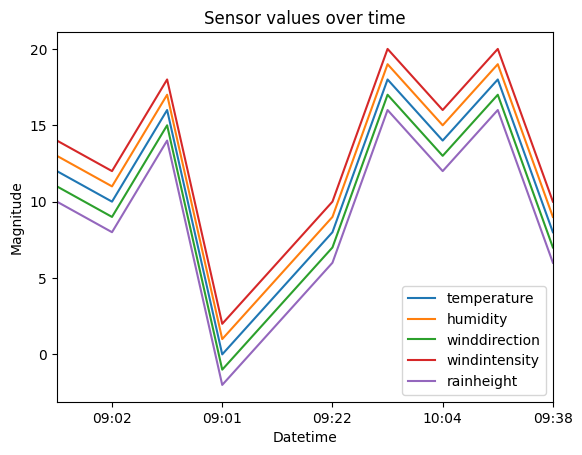

In [101]:
# sensorData.plot(x="timeHour", y="temperature")
sensorData.plot(x="timeHour")
plt.xlabel("Datetime")
plt.ylabel("Magnitude")
# plt.ylabel("Temperature", size = 20)
plt.xlim(sensorData.index[-1],sensorData.index[0])
plt.title("Sensor values over time")
plt.show()

<div style="height:60px;"><div style="height:7px;background-color:#20B3CD;width:100%;margin-top:20px;position:relative;"><img src="https://s3.amazonaws.com/iotanalytics-templates/Logo.png" style="height:50px;width:50px;margin-top:-20px;position:absolute;margin-left:42%;"></div></div>